In [1]:
import matplotlib.pyplot as plt
from torchvision import transforms
import torch as t
import numpy as np

torch.Size([3, 1080, 1080])

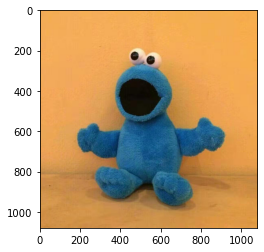

In [2]:
# read image
image = plt.imread('/Users/yaojiang/Downloads/IMG_2571.JPG')
plt.imshow(image)

# transform to tensor
totensor = transforms.ToTensor()  # this is a class
image_tensor = totensor(image)
image_tensor.size()

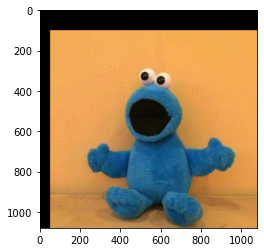

In [3]:
### translation 平移
# translate 50 px right, 100 px down
theta = np.array([
    [1, 0, 100],
    [0, 1, 50]
])
theta1 = theta[:, [0, 1]]  # control scale
theta2 = theta[:, [2]]  # control translation

# tensor method
_, h, w = image_tensor.size()
# generate zero tensor with image_tensor's dimension
new_image_tensor = t.zeros_like(image_tensor)
for i in range(h):
    for j in range(w):
        position = np.array([[i], [j]])
        new_position = theta1 @ position + theta2
        ni = new_position[0][0]
        nj = new_position[1][0]
#         ni = i + 100
#         nj = j + 50
        if 0<=ni<h and 0<=nj<w:
            new_image_tensor[:, ni, nj] = image_tensor[:, i, j]
plt.imshow(new_image_tensor.numpy().transpose(1, 2, 0))

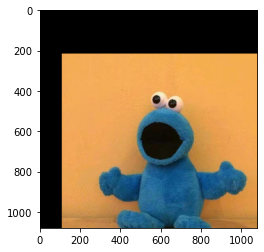

In [28]:
# torch method
from torch.nn import functional
theta = t.tensor([
    [1, 0, -0.2],  # -: means right and down
    [0, 1, -0.4]
], dtype=t.float)
# create grid
# unsqueeze(0) create batch number
grid = functional.affine_grid(theta.unsqueeze(0), 
                              # size here: we could change size to resize the image
                              image_tensor.unsqueeze(0).size())
# resample
# get the first sample in this unsqueezed batch
new_image_tensor = functional.grid_sample(image_tensor.unsqueeze(0), 
                                          grid)[0]
plt.imshow(new_image_tensor.numpy().transpose(1, 2, 0))

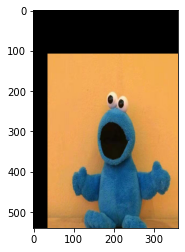

In [29]:
# torch method to resize
c = image_tensor.size()[0]
h = image_tensor.size()[1]
w = image_tensor.size()[2]
size = t.Size((1, c, h//2, w//3))
grid = functional.affine_grid(theta.unsqueeze(0), 
                              # size here: we could change size to resize the image
                              size)
# resample
# get the first sample in this unsqueezed batch
new_image_tensor = functional.grid_sample(image_tensor.unsqueeze(0), 
                                          grid)[0]
plt.imshow(new_image_tensor.numpy().transpose(1, 2, 0))

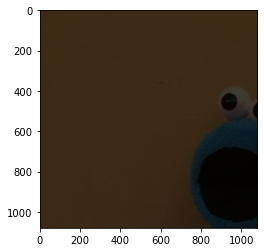

In [10]:
### scale 缩放
# tensor method
theta = np.array([
    [2, 0, 0],
    [0, 2, 0]
])
theta1 = theta[:, [0, 1]]  # control scale
theta2 = theta[:, [2]]  # control translation
_, h, w = image_tensor.size()
# generate zero tensor with image_tensor's dimension
new_image_tensor = t.zeros_like(image_tensor)
for i in range(h):
    for j in range(w):
        position = np.array([[i], [j]])
        new_position = theta1 @ position + theta2
        ni = new_position[0][0]
        nj = new_position[1][0]
#         ni = i + 100
#         nj = j + 50
        if 0<=ni<h and 0<=nj<w:
            new_image_tensor[:, ni, nj] = image_tensor[:, i, j]
plt.imshow(new_image_tensor.numpy().transpose(1, 2, 0))

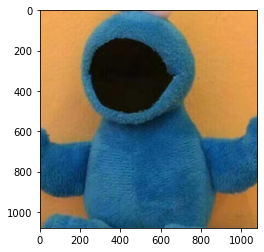

In [13]:
# torch method
# scale at center
theta = t.tensor([
    [0.5, 0, 0],
    [0, 0.5, 0]
])
grid = functional.affine_grid(theta.unsqueeze(0), 
                              image_tensor.unsqueeze(0).size())
new_image_tensor = functional.grid_sample(image_tensor.unsqueeze(0),
                                         grid)[0]
plt.imshow(new_image_tensor.numpy().transpose(1, 2, 0))

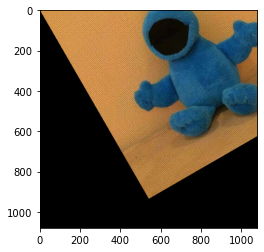

In [22]:
### rotate
import math
# tensor method
angle = 30*math.pi/180
# we have:
# x_new = x.cos(theta) - y.sin(theta)
# y_new = x.sin(theta) + y.cos(theta)
theta = np.array([
    [math.cos(angle), -math.sin(angle), 0],
    [math.sin(angle), math.cos(angle), 0]
])
theta1 = theta[:, [0, 1]]
theta2 = theta[:, [2]]

_, h, w = image_tensor.size()
new_image_tensor = t.zeros_like(image_tensor, dtype=t.float)
for i in range(h):
    for j in range(w):
        position = np.array([[i], [j]])
        new_position = theta1 @ position + theta2
        ni = int(new_position[0][0])
        nj = int(new_position[1][0])
        if 0<=ni<h and 0<=nj<w:
            new_image_tensor[:, ni, nj] = image_tensor[:, i, j]
plt.imshow(new_image_tensor.numpy().transpose(1, 2, 0))

/Users/yaojiang/ENTER/envs/deeplearning/lib/python3.7/site-packages/torch/nn/functional.py:2751: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/Users/yaojiang/ENTER/envs/deeplearning/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


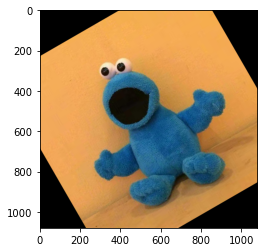

In [23]:
# torch method
theta = t.tensor([
    [math.cos(angle), -math.sin(angle), 0],
    [math.sin(angle), math.cos(angle), 0]
])
grid = functional.affine_grid(theta.unsqueeze(0), 
                              image_tensor.unsqueeze(0).size())
new_image_tensor = functional.grid_sample(image_tensor.unsqueeze(0), 
                                          grid)[0]
plt.imshow(new_image_tensor.numpy().transpose(1, 2, 0))

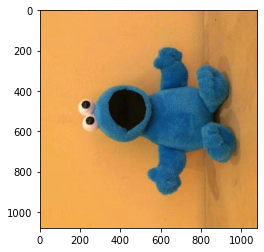

In [24]:
### transpose 转置
# tensor method
theta = np.array([
    [0, 1, 0],
    [1, 0, 0]
])
theta1 = theta[:, [0, 1]]
theta2 = theta[:, [2]]

_, h, w = image_tensor.size()
new_image_tensor = t.zeros_like(image_tensor, dtype=t.float)
for i in range(h):
    for j in range(w):
        position = np.array([[i], [j]])
        new_position = theta1 @ position + theta2
        ni = int(new_position[0][0])
        nj = int(new_position[1][0])
        if 0<=ni<h and 0<=nj<w:
            new_image_tensor[:, ni, nj] = image_tensor[:, i, j]
plt.imshow(new_image_tensor.numpy().transpose(1, 2, 0))

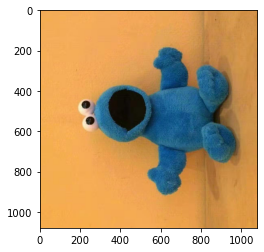

In [30]:
# torch method
# torch method
theta = t.tensor([
    [0, 1, 0],
    [1, 0, 0]
], dtype=t.float)
size = t.Size((1, c, w, h))  # also change size to avoid scale
grid = functional.affine_grid(theta.unsqueeze(0), size)
new_image_tensor = functional.grid_sample(image_tensor.unsqueeze(0), 
                                          grid)[0]
plt.imshow(new_image_tensor.numpy().transpose(1, 2, 0))

In [31]:
import random

In [34]:
random.random()

0.23844365108866405